### Use decision trees to prepare a model on fraud data 
### treating those who have taxable_income <= 30000 as "Risky" and 
### others are "Good"

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [2]:
df_fraud_check = pd.read_csv('Fraud_check.csv')
df_fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [3]:
df_fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df_fraud_check.rename(columns = {'Taxable.Income':'Taxable_income'}, inplace = True)
df_fraud_check.Taxable_income.describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable_income, dtype: float64

In [5]:
df_fraud_check['Undergrad'].replace(to_replace=['YES', 'NO'], value=['0', '1'], inplace=True)
df_fraud_check.Undergrad

0      1
1      0
2      1
3      0
4      1
      ..
595    0
596    0
597    1
598    0
599    1
Name: Undergrad, Length: 600, dtype: object

In [6]:
df_fraud_check['Urban'].replace(to_replace=['YES', 'NO'], value=['0', '1'], inplace=True)
df_fraud_check.Urban

0      0
1      0
2      0
3      0
4      1
      ..
595    0
596    0
597    0
598    1
599    1
Name: Urban, Length: 600, dtype: object

In [7]:
df_fraud_check.rename(columns = {'Marital.Status':'Marital_status'}, inplace = True)
df_fraud_check['Marital_status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [8]:
df_fraud_check['Marital_status'], class_names = pd.factorize(df_fraud_check['Marital_status'])
df_fraud_check.Marital_status

0      0
1      1
2      2
3      0
4      2
      ..
595    1
596    1
597    1
598    2
599    1
Name: Marital_status, Length: 600, dtype: int64

In [9]:
# Converting Sales feature into categorical type

taxable_inc = pd.cut(df_fraud_check.Taxable_income, bins=[0, 30000, 100000], labels=['Risky', 'Good'])

df_fraud_check.drop(['Taxable_income'], axis=1, inplace=True)
df_fraud_check.insert(0, 'Taxable_income', taxable_inc)

df_fraud_check

,Taxable_income,Undergrad,Marital_status,City.Population,Work.Experience,Urban
0,Good,1,0,50047,10,0
1,Good,0,1,134075,18,0
2,Good,1,2,160205,30,0
3,Good,0,0,193264,15,0
4,Good,1,2,27533,28,1
...,...,...,...,...,...,...
595,Good,0,1,39492,7,0
596,Good,0,1,55369,2,0
597,Good,1,1,154058,0,0
598,Good,0,2,180083,17,1


In [10]:
df_fraud_check.isna().sum()

Taxable_income     0
Undergrad          0
Marital_status     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

### Outlier detection using 'isolation forest'

In [11]:
from sklearn.ensemble import IsolationForest

In [12]:
df_copy = df_fraud_check.copy()
data_encoded = pd.get_dummies(df_copy)

In [13]:
# training the model

clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data_encoded)

IsolationForest(contamination=0.01, random_state=10)

In [14]:
# predictions

y_pred_outliers = clf.predict(data_encoded)
data_encoded

,Marital_status,City.Population,Work.Experience,Taxable_income_Risky,Taxable_income_Good,Undergrad_0,Undergrad_1,Urban_0,Urban_1
0,0,50047,10,0,1,0,1,1,0
1,1,134075,18,0,1,1,0,1,0
2,2,160205,30,0,1,0,1,1,0
3,0,193264,15,0,1,1,0,1,0
4,2,27533,28,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
595,1,39492,7,0,1,1,0,1,0
596,1,55369,2,0,1,1,0,1,0
597,1,154058,0,0,1,0,1,1,0
598,2,180083,17,0,1,1,0,0,1


In [15]:
data_encoded['scores'] = clf.decision_function(data_encoded)
data_encoded['anomaly'] = clf.predict(data_encoded.iloc[:, 0:9])
data_encoded

,Marital_status,City.Population,Work.Experience,Taxable_income_Risky,Taxable_income_Good,Undergrad_0,Undergrad_1,Urban_0,Urban_1,scores,anomaly
0,0,50047,10,0,1,0,1,1,0,0.113378,1
1,1,134075,18,0,1,1,0,1,0,0.134529,1
2,2,160205,30,0,1,0,1,1,0,0.051150,1
3,0,193264,15,0,1,1,0,1,0,0.103444,1
4,2,27533,28,0,1,0,1,0,1,0.075791,1
...,...,...,...,...,...,...,...,...,...,...,...
595,1,39492,7,0,1,1,0,1,0,0.102491,1
596,1,55369,2,0,1,1,0,1,0,0.091557,1
597,1,154058,0,0,1,0,1,1,0,0.079812,1
598,2,180083,17,0,1,1,0,0,1,0.117919,1


In [16]:
# Print the outlier data points

data_encoded[data_encoded['anomaly']==-1]

,Marital_status,City.Population,Work.Experience,Taxable_income_Risky,Taxable_income_Good,Undergrad_0,Undergrad_1,Urban_0,Urban_1,scores,anomaly
21,1,29106,7,1,0,1,0,1,0,-0.000240,-1
34,1,183767,1,1,0,1,0,1,0,-0.000150,-1
196,2,28410,21,1,0,1,0,0,1,-0.002185,-1
259,2,197841,7,1,0,0,1,0,1,-0.011481,-1
280,1,33184,1,1,0,0,1,0,1,-0.013653,-1
356,2,46480,27,1,0,0,1,0,1,-0.005965,-1


In [17]:
df_fraud_check.drop([21, 34, 196, 259, 280, 356], inplace=True)
df_fraud_check

,Taxable_income,Undergrad,Marital_status,City.Population,Work.Experience,Urban
0,Good,1,0,50047,10,0
1,Good,0,1,134075,18,0
2,Good,1,2,160205,30,0
3,Good,0,0,193264,15,0
4,Good,1,2,27533,28,1
...,...,...,...,...,...,...
595,Good,0,1,39492,7,0
596,Good,0,1,55369,2,0
597,Good,1,1,154058,0,0
598,Good,0,2,180083,17,1


### Buid decision tree classifier C5.0 using entropy criteria

In [18]:
df_fraud_check['Taxable_income'].unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

In [19]:
df_fraud_check.Taxable_income.value_counts()

Good     476
Risky    118
Name: Taxable_income, dtype: int64

In [20]:
# Splitting data into feature and class

x = df_fraud_check.iloc[:,1:]
y = df_fraud_check['Taxable_income']
x

,Undergrad,Marital_status,City.Population,Work.Experience,Urban
0,1,0,50047,10,0
1,0,1,134075,18,0
2,1,2,160205,30,0
3,0,0,193264,15,0
4,1,2,27533,28,1
...,...,...,...,...,...
595,0,1,39492,7,0
596,0,1,55369,2,0
597,1,1,154058,0,0
598,0,2,180083,17,1


In [21]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable_income, Length: 594, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [22]:
# Split data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# Model
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [23]:
df_fraud_check.columns

Index(['Taxable_income', 'Undergrad', 'Marital_status', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

[Text(348.75, 815.4, 'Work.Experience <= 0.5\nentropy = 0.718\nsamples = 475\nvalue = [381, 94]\nclass = Risky'),
 Text(271.25, 634.2, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = Risky'),
 Text(426.25, 634.2, 'City.Population <= 78967.0\nentropy = 0.725\nsamples = 466\nvalue = [372, 94]\nclass = Risky'),
 Text(232.5, 453.0, 'City.Population <= 75379.5\nentropy = 0.623\nsamples = 161\nvalue = [136, 25]\nclass = Risky'),
 Text(155.0, 271.80000000000007, 'Work.Experience <= 24.5\nentropy = 0.655\nsamples = 148\nvalue = [123, 25]\nclass = Risky'),
 Text(77.5, 90.60000000000002, 'entropy = 0.725\nsamples = 114\nvalue = [91, 23]\nclass = Risky'),
 Text(232.5, 90.60000000000002, 'entropy = 0.323\nsamples = 34\nvalue = [32, 2]\nclass = Risky'),
 Text(310.0, 271.80000000000007, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = Risky'),
 Text(620.0, 453.0, 'City.Population <= 138627.0\nentropy = 0.771\nsamples = 305\nvalue = [236, 69]\nclass = Risky'),
 Text(465.0, 271.800000000000

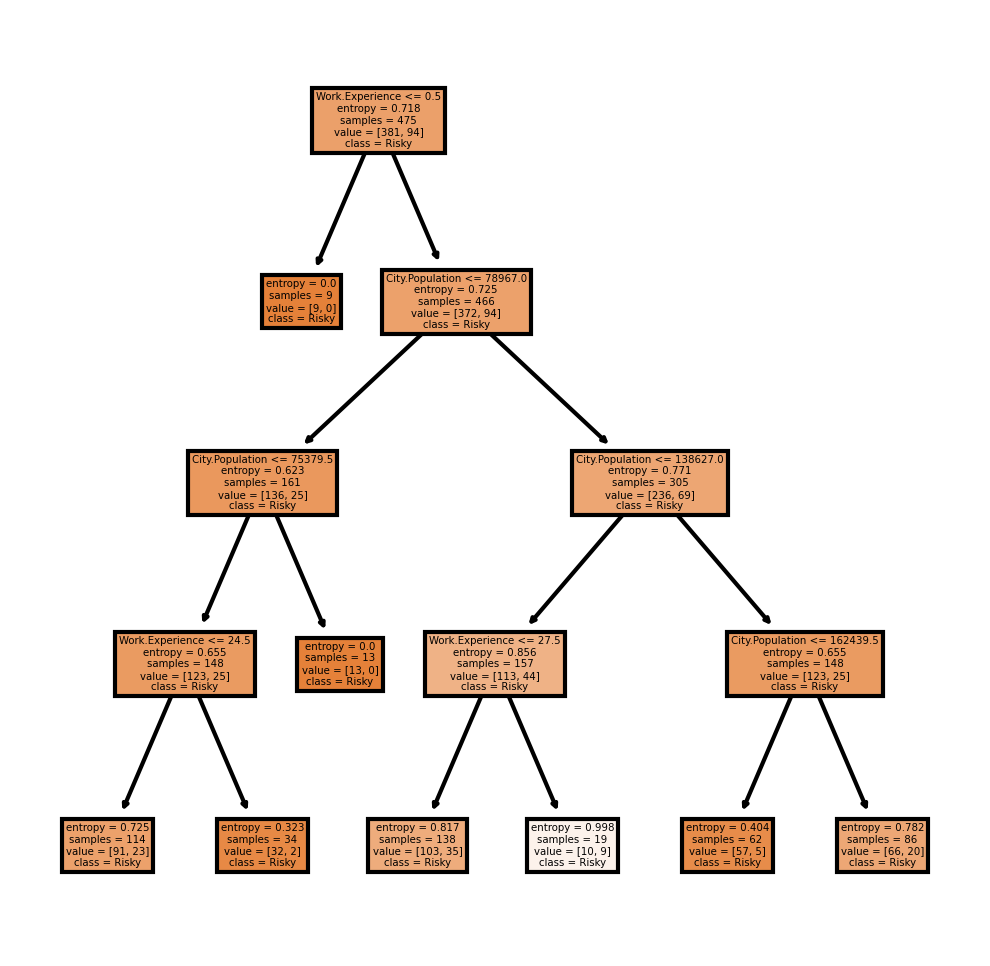

In [24]:
# Plot the tree

fn = [ 'Undergrad', 'Marital_status', 'City.Population',
       'Work.Experience', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True)

In [25]:
# Predicting on test data

preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good    119
dtype: int64

In [26]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [27]:
pd.crosstab(y_test, preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good
Taxable_income,
Risky,24
Good,95


In [28]:
# Accuracy

np.mean(preds==y_test)

0.7983193277310925

### Decision tree classifier CART using Gini criteria

In [29]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [30]:
# Prediction and computing the accuracy

pred = model_gini.predict(x_test)
np.mean(pred==y_test)

0.7983193277310925

[Text(476.07142857142856, 815.4, 'City.Population <= 81571.5\ngini = 0.317\nsamples = 475\nvalue = [381, 94]\nclass = Risky'),
 Text(243.57142857142856, 634.2, 'Work.Experience <= 6.5\ngini = 0.262\nsamples = 168\nvalue = [142, 26]\nclass = Risky'),
 Text(88.57142857142857, 453.0, 'Marital_status <= 1.5\ngini = 0.067\nsamples = 29\nvalue = [28, 1]\nclass = Risky'),
 Text(44.285714285714285, 271.80000000000007, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = Risky'),
 Text(132.85714285714286, 271.80000000000007, 'City.Population <= 61580.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = Risky'),
 Text(88.57142857142857, 90.60000000000002, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = Risky'),
 Text(177.14285714285714, 90.60000000000002, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Risky'),
 Text(398.57142857142856, 453.0, 'Work.Experience <= 20.5\ngini = 0.295\nsamples = 139\nvalue = [114, 25]\nclass = Risky'),
 Text(310.0, 271.80000000000007, 'Work.Experience <= 13.5

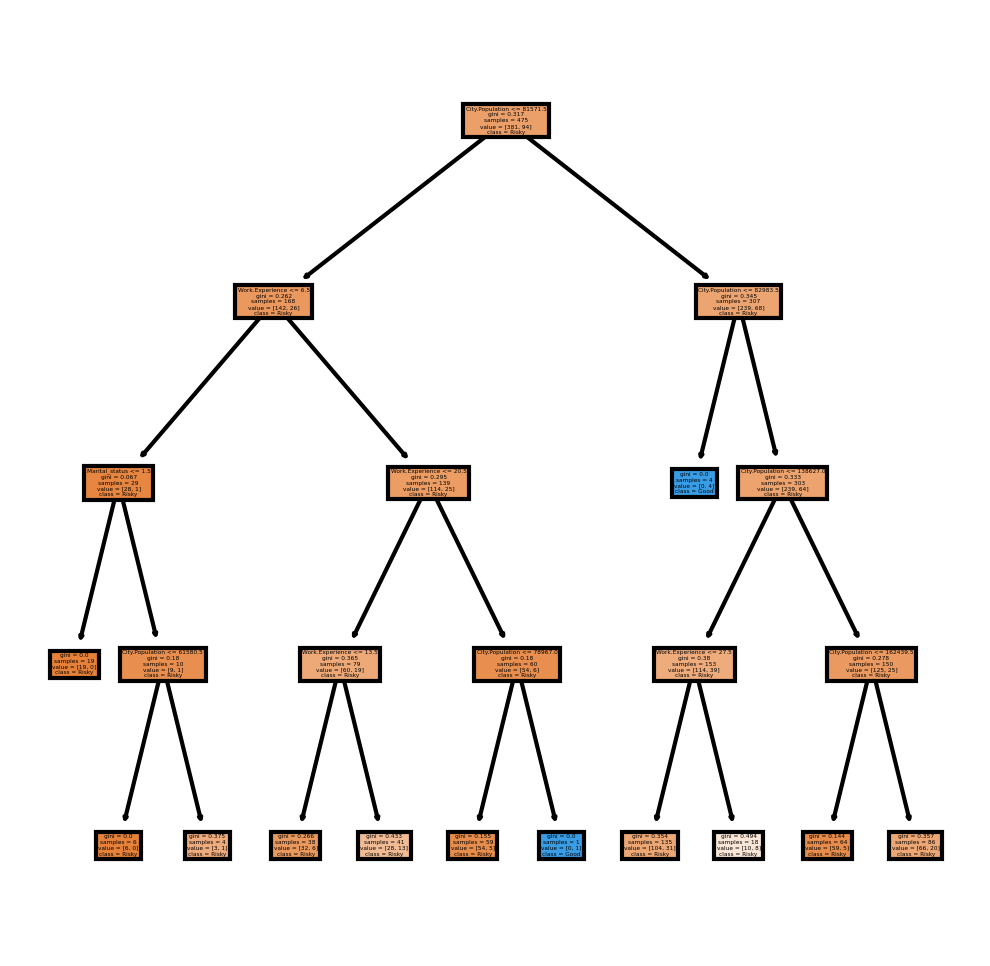

In [31]:
# Plot the tree

fn = [ 'Undergrad', 'Marital_status', 'City.Population',
       'Work.Experience', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True)